# Homework 6: Testing Hypotheses

**Reading**: Textbook chapter [11](https://www.inferentialthinking.com/chapters/11/testing-hypotheses.html).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to set up your notebook. REmember each time you start your server, you will need to execute this cell again.

In [17]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Catching Cheaters


Suppose you are a casino owner, and your casino runs a very simple game of chance.  The dealer flips a coin.  The customer wins 9 dollars from the casino if it comes up heads and loses 10 dollars if it comes up tails.

<div class="hide">\pagebreak</div>
**Question 1.** Assuming no one is cheating and the coin is fair, if a customer plays twice, what is the chance they make money?

In [3]:
p_winning_after_two_flips = (1/2)*(1/2)

A certain customer plays the game 20 times and wins 13 of the bets.  You suspect that the customer is cheating!  That is, you think that their chance of winning is higher than the normal chance of winning.

You decide to test your hunch using the outcomes of the 20 games you observed.

In [9]:
#null= normal dağılıma uyuyor
#alt= normal dağılıma uymuyor

<div class="hide">\pagebreak</div>
**Question 2.** Define the null hypothesis and alternative hypothesis for this investigation.

**Null hypothesis:** The customer’s chance of winning is the same as the normal chance

**Alternative hypothesis:** The customer’s chance of winning is higher than the normal chance

<div class="hide">\pagebreak</div>

**Question 3.** Given the outcome of 20 games, which of the following test statistics would be a reasonable choice for this hypothesis test? 

*Hint*: For a refresher on choosing test statistics, check out [Section 11.3 of the textbook](https://www.inferentialthinking.com/chapters/11/3/decisions-and-uncertainty.html#Step-2:-The-Test-Statistic).

1. Whether there is at least one win.
1. Whether there is at least one loss.
1. The number of wins.
1. The number of wins minus the number of losses.
1. The total variation distance between the probability distribution of a fair coin and the observed distribution of heads and tails.
1. The total amount of money that the customer won.

Assign `reasonable_test_statistics` to a **list** of numbers corresponding to these test statistics.

In [2]:
reasonable_test_statistics = [5]

<div class="hide">\pagebreak</div>
Suppose you decide to use the number of wins as your test statistic.

**Question 4.** Write a function called `simulate` that simulates your test statistic.  It should take no arguments.  It should return the number of wins in 20 games simulated under the assumption that the result of each game is sampled from a fair coin (one that is equally likely to get heads or tails).

*Hint*: You may find the [`sample_proportions`](https://www.inferentialthinking.com/chapters/11/1/assessing-models.html#Generating-One-Value-of-the-Statistic) function to be useful.

In [55]:
def simulate():
    prop=sample_proportions(20, make_array(0.5,0.5)) 
    return prop.item(0)*20
simulate()

10.0

**Question 5.** Using 10,000 trials, generate simulated values of the number of wins in 20 games. Assign `test_statistics_under_null` to an array that stores the result of each of these trials.

*Hint*: Feel free to use the function you defined in Question 4.

In [57]:
test_statistics_under_null = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    wins = simulate()
    test_statistics_under_null = np.append(test_statistics_under_null, wins)
test_statistics_under_null

array([ 7., 12., 12., ..., 13., 12., 10.])

**Question 6.** Using the results from Question 5, generate a histogram of the empirical distribution of the number of wins in 20 games.

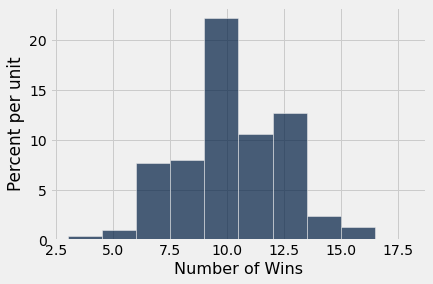

In [58]:
games_20=Table().with_column("Number of Wins", test_statistics_under_null)
games_20.hist()

<div class="hide">\pagebreak</div>

**Question 7.** Compute an empirical P-value for this test.

*Hint:* Which values of our test statistic are in the direction of the alternative hypothesis?

In [59]:
np.count_nonzero(test_statistics_under_null >= 13)/10000

0.133

**Question 8.** Suppose you use a P-value cutoff of 1%, according to the arbitrary conventions of hypothesis testing.  What do you conclude about the null and alternative hypotheses? Why?

accept the null hypothesis because 13.3% is bigger than 1%

**Question 9.** Is `p_value` the probability that the customer cheated, or the probability that the customer didn't cheat, or neither? If neither, what is it?

neither. p-value is the absolute difference of test statistics and observed test statistics.

**Question 10.** Is 1% (the P-value cutoff) the probability that the customer cheated, or the probability that the customer didn't cheat, or neither? If neither, what is it?

1% is a cut off line. if the p value smaller than the cut off line, we reject the null hypothesis, because the chance of getting that result is not based on randomness and we can say something is going on.

**Question 11.** Suppose you run this test for 400 different customers after observing each customer play 20 games.  When you reject the null hypothesis for a customer, you accuse that customer of cheating.  If no customer were actually cheating, can we compute how many we will incorrectly accuse of cheating? If so, what is the number? Explain your answer. Assume a 1% P-value cutoff.

there is a 1% chance that we can be mistaken. so we can accuse 4 people incorrectly

## 2. Landing a Spacecraft


(Note: This problem describes something that's close to [a real story with a very exciting video](http://www.space.com/29119-spacex-reusable-rocket-landing-crash-video.html), but the details have been changed somewhat.)

SpaceY, a company that builds and tests spacecraft, is testing a new reusable launch system.  Most spacecraft use a "first stage" rocket that propels a smaller payload craft away from Earth, then falls back to the ground and crashes.  SpaceY's new system is designed to land safely at a landing pad at a certain location, ready for later reuse.  If it doesn't land in the right location, it crashes, and the (very expensive) vehicle is destroyed.

SpaceY has tested this system over 1000 times.  Ordinarily, the vehicle doesn't land exactly on the landing pad.  For example, a gust of wind might move it by a few meters just before it lands.  It's reasonable to think of these small errors as random.  That is, the landing locations are drawn from some distribution over locations on the surface of Earth, centered around the landing pad.

Run the next cell to see a plot of those locations.

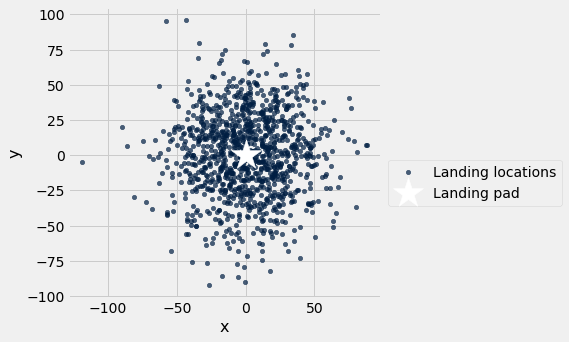

In [60]:
ordinary_landing_spots = Table.read_table("ordinary_landing_spots.csv")
ordinary_landing_spots.scatter("x", label="Landing locations")
plt.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

During one test, the vehicle lands far away from the landing pad and crashes.  SpaceY investigators suspect there was a problem unique to this landing, a problem that wasn't part of the ordinary pattern of variation in landing locations.  They think a software error in the guidance system caused the craft to incorrectly attempt to land at a spot other than the landing pad.  The guidance system engineers think there was nothing out of the ordinary in this landing, and that there was no special problem with the guidance system.

Run the cell below to see a plot of the 1100 ordinary landings and the crash.

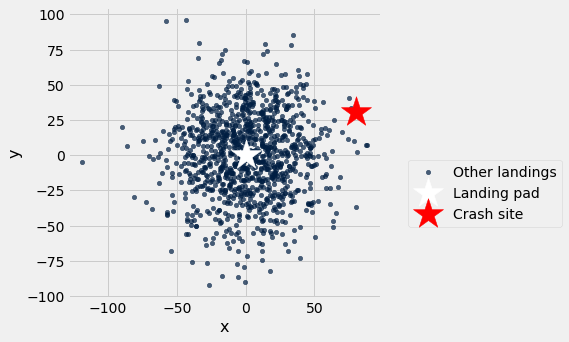

In [61]:
landing_spot = make_array(80.59, 30.91)
ordinary_landing_spots.scatter("x", label="Other landings")
plt.scatter(0, 0, c="w", s=1000, marker="*", label="Landing pad")
plt.scatter(landing_spot.item(0), landing_spot.item(1), marker="*", c="r", s=1000, label="Crash site")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

**Question 1.** Suppose we'd like to use hypothesis testing to shed light on this question.  We've written down an alternative hypothesis below.  What is a reasonable null hypothesis?

**Null hypothesis:** The landing is caused by randomness

**Alternative hypothesis:** This landing was special; its location was a draw from some other distribution, not the distribution from which the other 1100 landing locations were drawn.

**Question 2.** What's a good test statistic for this hypothesis test? 

*Hint:* A test statistic can be almost anything, but a *good* test statistic varies informatively depending on whether the null is true. So for this example, we might think about a test statistic that would be small if the null is true, and large otherwise. If we want to compare landings, we might want to see *how far* each landing is from some *reference point*, so we can compare all landings from the same vantage point.

**Test statistic:** distance between the crash point and the landing site compared to other
landing sites

<div class="hide">\pagebreak</div>
**Question 3.** Write a function called `landing_test_statistic`.  It should take two arguments: an "x" location and a "y" location (both numbers).  It should return the value of your test statistic for a landing at those coordinates.

In [64]:
def landing_test_statistic(x_coordinate, y_coordinate):
    test_statistic = make_array(x_coordinate, y_coordinate) #kök içinde kareleri toplamı
    return abs(((test_statistic.item(0)**2) + (test_statistic.item(1)**2))**(1/2))

**Question 4.** The next three cells compute a P-value using your test statistic. Describe the test procedure in words. Is there a simulation involved? If so, what is being simulated? If not, why not? Where are we getting the data from? What kind of calculations are being performed? How are we calculating our p-value? 

*Hint:* Think about what a [simulation](https://www.inferentialthinking.com/chapters/09/3/simulation.html) actually consists of.

In [65]:
observed_test_stat = landing_test_statistic(
    landing_spot.item(0),
    landing_spot.item(1))

observed_test_stat

86.31440320131978

In [66]:
null_stats = make_array()
repetitions = ordinary_landing_spots.num_rows

for i in np.arange(repetitions):
    null_stat = landing_test_statistic(
        ordinary_landing_spots.column('x').item(i),
        ordinary_landing_spots.column('y').item(i))
    null_stats = np.append(null_stats, null_stat)
    
null_stats

array([ 7.0373003 , 37.04323884, 28.24132651, ..., 20.84023432,
       32.48926398, 23.88691421])

In [67]:
p_value = np.count_nonzero(null_stats >= observed_test_stat) / len(null_stats)
p_value

0.012727272727272728

The observed test statistic is calculated from the coordinates of the crash site. we use a for loop to compute the test statistics for other landings sites. we use the function we defined  by using the given data for x and y values. After that we assign the results to a array called null_stats. this is not a simulation because data is already given to us and we used this data for calculations. After that we checked the all the null stat array with the observed test data to calculate p value.


Congratulations! You have reached the end of homework 6, please make sure you run all cells before submission!